In [1]:
# package import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re # regex to clean data

# file import
sf_data=pd.read_csv('./ML Perov Data/Data Summary for New Plasma Cleaned.csv')
sf_data1 = sf_data.dropna()

from sklearn.preprocessing import LabelEncoder
cat2label = LabelEncoder()

sf_data1.iloc[:,5] = cat2label.fit_transform(sf_data1['Curing source'].astype('str')) #'Curing source' 
sf_data1.iloc[:,9] = cat2label.fit_transform(sf_data1['Gas'].astype('str')) #'Gas' 0: Air 1: N2
sf_data1.iloc[:,11]= pd.to_numeric(sf_data1['Plasma Height (cm)'].astype('str'), errors='coerce').fillna(0).astype('float') #'Plasma Height (cm)' 0: no plamsa
sf_data1.iloc[:,13] = cat2label.fit_transform(sf_data1['Cs/Br Content (%)'].astype('str'))*0.17
sf_data1.iloc[:,14] = cat2label.fit_transform(sf_data1['Position (L/R)'].astype('str'))
sf_data1.iloc[:,16] = cat2label.fit_transform(sf_data1['Steady State Plasma?'].astype('str'))  # 0: No 1: Yes

sf_data1.head(5)

,Sample,Concentration (M),DMSO Amount (%),MACl Additive (%),PbI2 additive (%),Curing source,Speed (mm/s),Temperature (Celsius),Spray Flow Rate (uL/min),Gas,...,Voc (V),Isc (A),Jsc (mA/cm2),Imax (A),Vmax (V),Pmax (mW),Fill Factor,Efficiency (%),R at Voc (Ohms),R at Isc (Ohms)
0,A1L 2020-01-25 14-27-50,0.3,67,0,0,0,100,155,3000,1,...,0.979287,0.001847,8.796677,0.001316,0.699592,0.920830,50.9016,4.3849,127.750200,2184.395
1,A1R 2020-01-25 14-28-13,0.3,67,0,0,0,100,155,3000,1,...,0.960428,0.001998,9.512507,0.001448,0.699027,1.012476,52.7722,4.8213,110.308481,2072.577
2,A2L 2020-01-25 14-26-19,0.3,67,0,0,0,100,155,2000,1,...,0.967264,0.003377,16.078760,0.002722,0.720479,1.961110,60.0462,9.3386,47.750394,2371.154
3,A3L 2020-01-25 14-23-46,0.3,67,0,0,0,200,155,4000,1,...,0.998674,0.003397,16.178293,0.002779,0.732059,2.034449,59.9613,9.6879,71.760349,2702.679
4,A3R 2020-01-25 14-24-57,0.3,67,0,0,0,200,155,4000,1,...,0.994729,0.003396,16.171185,0.002720,0.761237,2.070453,61.2914,9.8593,52.074472,2517.947


In [2]:
sf_cols=sf_data.columns.values # get column names for indexing later
sf_col_vals=[] # build array of columns only of numerical columns
for n in range(24):
    # pass columns we don't care about right now
    if n==17 or n== 19 or n==20 or n==21:
        pass
    else: # Clean numerical columns
        sf_col_vals.append(n+1)
        print(n,'.', sf_cols[n+1])
        
        # replace #VALUE! with np.nan
        sf_data1.loc[sf_data1.iloc[:,n+1]=='#VALUE!',sf_cols[n+1]]=np.nan
        # the next line selects all NaN values, converts to string, strips "," vlaues (you can add more non-digit values to strip) then converts to a string and overwrites the non NaN values in sf_data
        # we have to skip NaN values or else converting to a string will change NaN to ""
        (sf_data1.loc[~sf_data1.iloc[:,n+1].isnull(),sf_cols[n+1]])=((sf_data1.loc[~sf_data1.iloc[:,n+1].isnull(),sf_cols[n+1]]).astype('str').replace(r",","",regex=True).astype('float'))

sf_data1['Humidity (%)'] = np.round(sf_data1['Humidity (%)'].values/5)*5

0 . Concentration (M)
1 . DMSO Amount (%)
2 . MACl Additive (%)
3 . PbI2 additive (%)
4 . Curing source
5 . Speed (mm/s)
6 . Temperature (Celsius)
7 . Spray Flow Rate (uL/min)
8 . Gas
9 . Gas Flow Rate (LPM)
10 . Plasma Height (cm)
11 . Humidity (%)
12

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.p

 . Cs/Br Content (%)
13 . Position (L/R)
14 . Spray Height (cm)
15 . Steady State Plasma?
16 . Voc (V)
18 . Jsc (mA/cm2)
22 . Fill Factor
23 . Efficiency (%)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.p

In [25]:
corr_matrix=(sf_data1.iloc[:,sf_col_vals]) # get matrix of values we want to correlate
df = corr_matrix[corr_matrix['Efficiency (%)'] >= 0]  
corr_matrix1=df.iloc[:,[0,5,6,7,9,10,11, 12, 14,15, 16, 17, 18,19]]
corr_matrix1 = corr_matrix1[corr_matrix1['Cs/Br Content (%)']== 0]
corr_matrix1 =  corr_matrix1[corr_matrix1['Concentration (M)']== 0.15]
corr_matrix1 =  corr_matrix1[corr_matrix1['Steady State Plasma?']== 1]
corr_matrix1['plasmaDC [%]'] = np.ones(len(corr_matrix1))*100
corr_matrix1['Fill Factor'] = corr_matrix1['Fill Factor']/100
corr_matrix1 = corr_matrix1.iloc[:,[2,1,3,5,4,-1,-5,-4,-3, -2]]
corr_matrix1.columns = ['Temp [degC]', 'speed [mm/s]','sprayFL [uL/min]', 
                        'plamsaH [cm]', 'gasFL [L/min]', 'plasmaDC [%]',
                        'Jsc [mA/cm2]', 'Voc [V]', 'FF [-]', 'Efficiency [%]']

df_previous = corr_matrix1.reset_index(drop=True)
print(len(df_previous.iloc[:,0:5].drop_duplicates(ignore_index = True)))
df_previous.describe()

24


,Temp [degC],speed [mm/s],sprayFL [uL/min],plamsaH [cm],gasFL [L/min],plasmaDC [%],Jsc [mA/cm2],Voc [V],FF [-],Efficiency [%]
count,66.000000,66.000000,66.000000,66.00000,66.000000,66.0,66.000000,66.000000,66.000000,66.000000
mean,139.757576,142.424242,3363.636364,1.00000,14.909091,100.0,0.907093,19.679475,0.638501,11.556094
std,6.341707,26.663753,710.067465,0.14676,2.209958,0.0,0.067598,2.556204,0.074895,2.700813
min,125.000000,100.000000,2500.000000,0.80000,10.000000,100.0,0.674137,4.343404,0.434645,1.759700
25%,135.000000,150.000000,3000.000000,1.00000,15.000000,100.0,0.869401,19.275987,0.583166,9.735875
50%,140.000000,150.000000,3000.000000,1.00000,15.000000,100.0,0.931908,20.101991,0.628183,11.878500
75%,145.000000,150.000000,4000.000000,1.00000,15.000000,100.0,0.950997,20.911277,0.706561,13.545850
max,155.000000,200.000000,5000.000000,1.50000,25.000000,100.0,1.000041,23.483479,0.764603,15.514500


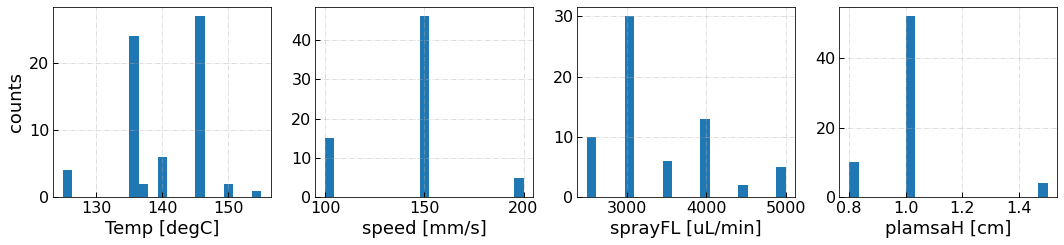

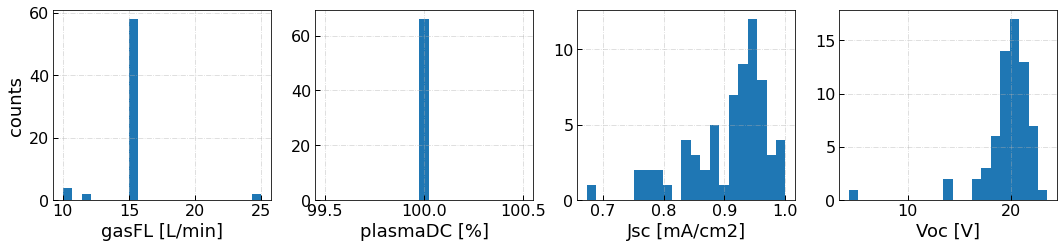

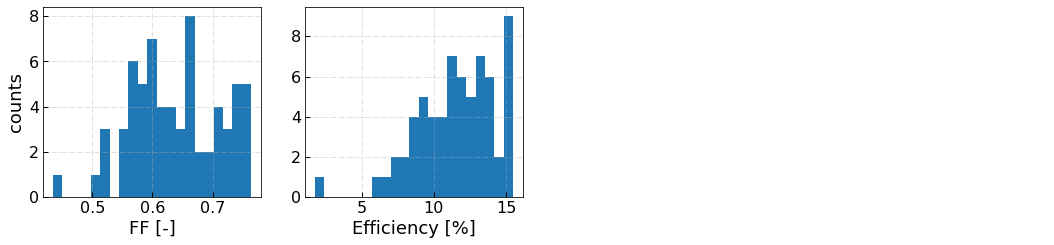

In [8]:
df = df_previous
df_cols = df.columns
n_col = 4 # num of columns per row in the figure

for n in np.arange(0, 12, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins=21)####
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

In [258]:
### df_previous.to_excel("new_plamsa_previous_selected_20200927.xlsx") 